In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from LLS import LLS

In [4]:
data = pd.read_csv("Houseprice.csv")
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [5]:
data.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [6]:
data.shape

(3479, 8)

In [7]:
data.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(3456, 8)

In [10]:
import re
data['Area'] = data['Area'].apply(lambda x: re.sub(',', '', x))
data["Area"] = pd.to_numeric(data["Area"] , errors='coerce')

In [11]:
data.replace({False: 0, True: 1}, inplace=True)

In [12]:
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,1,1,1,Niavaran,6.800000e+09,226666.67
3476,75,2,0,0,0,Parand,3.650000e+08,12166.67
3477,105,2,1,1,1,Dorous,5.600000e+09,186666.67


update dollar price to july 2023

In [13]:
data['Price(USD)'] = data['Price'] / 49800
data['Price'] = data['Price'].astype('int64')
data['Price(USD)'] = data['Price(USD)'].round(decimals= 2)

Show the address of the 5 most expensive houses

In [14]:
data.sort_values('Price', ascending=False).head(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1707,420,4,1,1,1,Zaferanieh,92400000000,1855421.69
1810,705,5,1,1,0,Abazar,91000000000,1827309.24
430,400,5,1,1,0,Lavasan,85000000000,1706827.31
819,680,5,1,1,0,Ekhtiarieh,81600000000,1638554.22
1332,350,4,1,1,1,Niavaran,80500000000,1616465.86


In [15]:
X= np.array(data[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']])

In [16]:
Y = np.array(data['Price'])
X = X.astype('int64')
Y = Y.astype('int64')

Split your dataset to train and test with train_test_split function

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=None, train_size = .8)

Fit the LLS model on your training dataset

In [18]:
lls_model = LLS()
w = lls_model.fit(X_train, y_train)
w

array([-7.04761280e+01,  4.85568803e+09,  7.22582645e+08, -3.86409795e+09,
       -6.55640644e+08])

In [19]:
Y_pred = lls_model.predict(X_test)

Evaluate your model on your test dataset using MAE, MSE and RMSE loss functions. Why the MSE metric is a very large number?

In [20]:
def Mean_Absolute_Error(y_test, y_pred):
    MAE = np.absolute(np.subtract(y_test, y_pred)).mean()
    return MAE

In [21]:
def Mean_Square_Error(y_test, y_pred):
    MSE = np.square(np.subtract(y_test, y_pred)).mean()
    return MSE


In [22]:
def ROOT_MSE(y_test, y_pred):
    RMSE = np.sqrt((np.subtract(y_test, y_pred)**2).mean())
    return RMSE

In [23]:
MAE_our_model = Mean_Absolute_Error(y_test, Y_pred)
MSE_our_model = Mean_Square_Error(y_test, Y_pred)
RMSE_our_model = ROOT_MSE(y_test, Y_pred)
print ("Mean Absolute Error with our model is:" , MAE_our_model)
print ("Mean Square Error with our model is:" , MSE_our_model)
print ("Root Mean Square Error with our model is:" , RMSE_our_model)

Mean Absolute Error with our model is: 4309751351.460025
Mean Square Error with our model is: 4.513556191803522e+19
Root Mean Square Error with our model is: 6718300523.051587


Compare your result with Scikit-Learn's results

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV 

In [25]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [26]:
MAE_Linear_Regression = Mean_Absolute_Error(y_test, y_pred)
MSE_Linear_Regression = Mean_Square_Error(y_test, y_pred)
RMSE_Linear_Regression = ROOT_MSE(y_test, y_pred)

In [27]:
print ("Mean Absolute Error with Sklearn Linear Regression is:" , MAE_Linear_Regression)
print ("Mean Square Error with Sklearn Linear Regression is:" , MSE_Linear_Regression)
print ("Root Mean Square Error with Sklearn Linear Regression is:" , RMSE_Linear_Regression)

Mean Absolute Error with Sklearn Linear Regression is: 4045032357.0538745
Mean Square Error with Sklearn Linear Regression is: 4.0985869261644415e+19
Root Mean Square Error with Sklearn Linear Regression is: 6402020717.058358


In [28]:
model = RidgeCV()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [29]:
MAE_Ridge_CV = Mean_Absolute_Error(y_test, y_pred)
MSE_Ridge_CV = Mean_Square_Error(y_test, y_pred)
RMSE_Ridge_CV = ROOT_MSE(y_test, y_pred)

In [30]:
print ("Mean Absolute Error with Sklearn Ridge CV is:" , MAE_Ridge_CV)
print ("Mean Square Error with Sklearn Ridge CV is:" , MSE_Ridge_CV)
print ("Root Mean Square Error with Sklearn Ridge CV is:" , RMSE_Ridge_CV)

Mean Absolute Error with Sklearn Ridge CV is: 1218555093820.4707
Mean Square Error with Sklearn Ridge CV is: 1.4849175529308682e+24
Root Mean Square Error with Sklearn Ridge CV is: 1218571931783.6218


<BarContainer object of 3 artists>

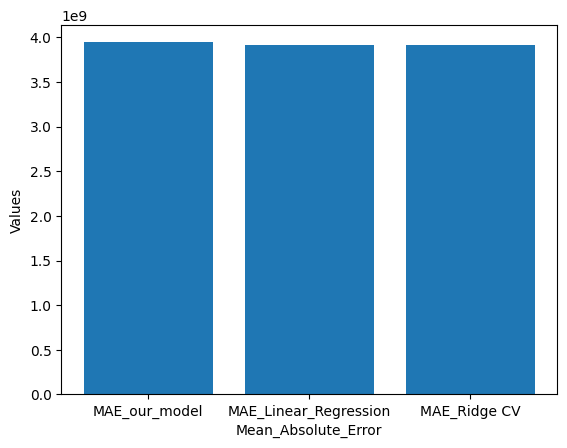

In [31]:
x = [ 'MAE_our_model', 'MAE_Linear_Regression', 'MAE_Ridge CV']
y = [ 3942105949.5493283 , 3913481100.397159, 3913481100.397159 ]
plt.xlabel('Mean_Absolute_Error')
plt.ylabel('Values')
plt.bar(x,y)

<BarContainer object of 3 artists>

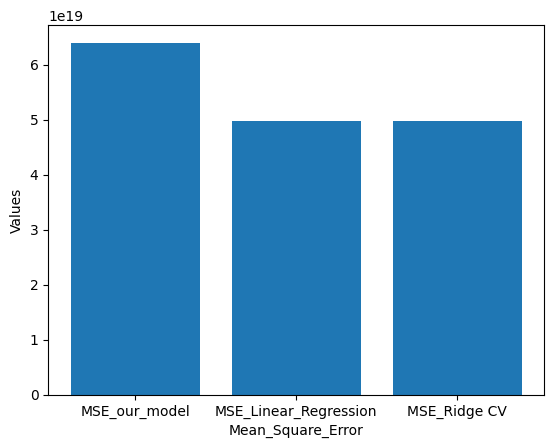

In [32]:
x = [ 'MSE_our_model', 'MSE_Linear_Regression', 'MSE_Ridge CV']
y = [ 6.400653553112821e+19 , 4.98186272726287e+19, 4.98186272726287e+19 ]
plt.xlabel('Mean_Square_Error')
plt.ylabel('Values')
plt.bar(x,y)

<BarContainer object of 3 artists>

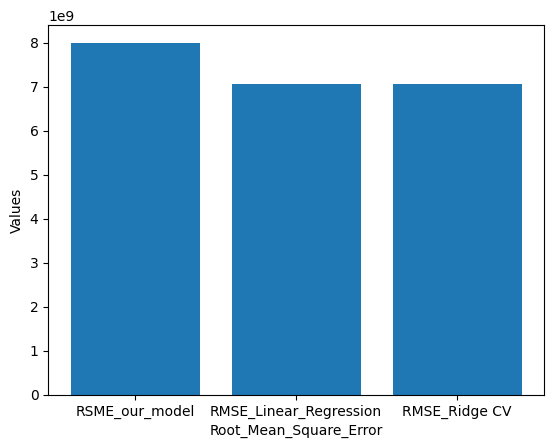

In [33]:
x = [ 'RSME_our_model', 'RMSE_Linear_Regression', 'RMSE_Ridge CV']
y = [  8000408460.268026 ,  7058231171.662537, 7058231171.662537 ]
plt.xlabel('Root_Mean_Square_Error')
plt.ylabel('Values')
plt.bar(x,y)
